# "A Comprehensive Analysis of Google Play Store Apps"



#### Made by: ASHISH SINGH 
#### Internship ID: CRIN2301701

####  PROBLEM STATEMENT

Technology is an increasing need nowadays and used everywhere. One of the features of
Technology is android. Which we all use in our daily life. Android is a mobile operating system
based on a modified version of the Linux kernel and other open-source software, designed
primarily for touchscreen mobile devices such as smartphones and tablets.
Do ETL: Extract-Transform-Load the dataset and find for me some information from this large
data. This is a form of data mining. What all information can be achieved by mining this data
would be brainstormed by the interns.

Find key metrics and factors and show the meaningful relationships between attributes. Do
your own research and come up with your findings.

#### INTRODUCTION

The **Data Science Project** aims to analyze a dataset provided from the Twilearn, that contains information about various mobile applications available on the Google Play Store. The dataset includes attributes such as the Name of the App, category, rating, reviews, size, installs, genres, etc.

The goal of the project is to __use data analysis techniques to gain insights into the mobile app 
market__, identify trends and patterns, and make data-driven recommendations for app developers 
to improve their products and reach a wider audience. 


In [1]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')


In [2]:
%matplotlib inline

In [3]:
# importing the dataset
data=pd.read_csv('Google Apps data.csv')

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design


In [5]:
print('The Shape of the Dataset: ',data.shape)

The Shape of the Dataset:  (8276, 15)


It appears that there are **8276** Records in the dataset and **15** Attributes in the Dataset.

#### DATA PREPROCESSING

It seems that the **Column 1:** `"Unnamed: 0.1"` is just describing the Serial Number of the Entries in the Dataset.
    

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         8276 non-null   int64  
 1   Unnamed: 0           8276 non-null   int64  
 2   App                  8276 non-null   object 
 3   Category             8276 non-null   object 
 4   Rating               8276 non-null   float64
 5   Reviews              8276 non-null   int64  
 6   Size                 8276 non-null   float64
 7   Installs             8276 non-null   int64  
 8   Type                 8276 non-null   object 
 9   Price                8276 non-null   float64
 10  Content Rating       7915 non-null   object 
 11  Last Updated         8276 non-null   object 
 12  Current Ver          8276 non-null   object 
 13  Minimum Android Ver  8276 non-null   object 
 14  Genres               8276 non-null   object 
dtypes: float64(3), int64(4), object(8)
mem

There is **missing values** in `Content Rating`

In [7]:
data['Content Rating'].isna().sum()

361

It summarizes that there are: **8276** Records and the **Column:** `Content Rating` contains **361** missing values.

In [8]:
data['Content Rating'].unique()

array(['Others', 'Teen', nan], dtype=object)

In [9]:
data['Content Rating']

0       Others
1       Others
2       Others
3         Teen
4       Others
         ...  
8271    Others
8272    Others
8273    Others
8274       NaN
8275    Others
Name: Content Rating, Length: 8276, dtype: object

Using Imputation Techniques to fill the missing values in the `Content Rating` Attribute.

In [10]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent',missing_values=np.nan)
data['Content Rating']=si.fit_transform(np.array(data['Content Rating']).reshape(-1,1))

In [11]:
data['Content Rating'].unique()

array(['Others', 'Teen'], dtype=object)

In [12]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Rating,Reviews,Size,Installs,Price
count,8276.000000,8276.000000,8276.000000,8.276000e+03,8276.000000,8.276000e+03,8276.000000
mean,4137.500000,4560.609957,4.175121,2.803270e+05,18.897761,9.658206e+06,1.028758
std,2389.219747,2560.879748,0.534762,2.096170e+06,22.376521,5.986505e+07,16.776622
min,0.000000,0.000000,1.000000,1.000000e+00,0.008300,1.000000e+00,0.000000
25%,2068.750000,2459.750000,4.000000,1.290000e+02,2.800000,1.000000e+04,0.000000
50%,4137.500000,4613.500000,4.300000,3.213500e+03,9.500000,1.000000e+05,0.000000
75%,6206.250000,6765.250000,4.500000,4.627800e+04,27.000000,1.000000e+06,0.000000
max,8275.000000,8916.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [13]:
## removing un-neccessary columns

unneccesary=['Unnamed: 0.1','Unnamed: 0','Current Ver']
data1=data.drop(columns=unneccesary,axis=1)
data1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Minimum Android Ver,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",4.0.3,Art & Design
1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",4.0.3,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",4.0.3,Art & Design


It appears that Columns: `Category` and `Genres` contains the same data. Let's check it.

In [14]:
# Checking whether Category and Genres Col. have the same entries or not

if (data1['Category'] == data1['Genres']).all():
    print("The values in the two attributes are equal.")
else:
    print("The values in the two attributes are not equal.")
    
# the all() method is used to check whether all the values in the two columns are equal.
    

The values in the two attributes are not equal.


In [15]:
data1['Category'].nunique()

33

In [16]:
data1['Category'].unique()

array(['Art And Design', 'Auto And Vehicles', 'Beauty',
       'Books And Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food And Drink', 'Health And Fitness', 'House And Home',
       'Libraries And Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel And Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players', 'News And Magazines', 'Maps And Navigation'],
      dtype=object)

In [17]:
data1['Genres'].nunique()

48

In [18]:
data1['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [19]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [20]:
data['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int64)

In [21]:
data['Size'].unique()

array([1.9000e+01, 1.4000e+01, 8.7000e+00, 2.5000e+01, 2.8000e+00,
       5.6000e+00, 2.9000e+01, 3.3000e+01, 3.1000e+00, 2.8000e+01,
       1.2000e+01, 2.0000e+01, 2.1000e+01, 3.7000e+01, 5.5000e+00,
       1.7000e+01, 3.9000e+01, 3.1000e+01, 4.2000e+00, 2.3000e+01,
       6.0000e+00, 6.1000e+00, 4.6000e+00, 9.2000e+00, 5.2000e+00,
       1.1000e+01, 2.4000e+01, 1.0000e+00, 9.4000e+00, 1.5000e+01,
       1.0000e+01, 1.2000e+00, 2.6000e+01, 8.0000e+00, 7.9000e+00,
       5.6000e+01, 5.7000e+01, 3.5000e+01, 5.4000e+01, 1.9629e-01,
       3.6000e+00, 5.7000e+00, 8.6000e+00, 2.4000e+00, 2.7000e+01,
       2.7000e+00, 2.5000e+00, 7.0000e+00, 1.6000e+01, 3.4000e+00,
       8.9000e+00, 3.9000e+00, 2.9000e+00, 3.8000e+01, 3.2000e+01,
       5.4000e+00, 1.8000e+01, 1.1000e+00, 2.2000e+00, 4.5000e+00,
       9.8000e+00, 5.2000e+01, 9.0000e+00, 6.7000e+00, 3.0000e+01,
       2.6000e+00, 7.1000e+00, 2.2000e+01, 6.4000e+00, 3.2000e+00,
       8.2000e+00, 4.9000e+00, 9.5000e+00, 5.0000e+00, 5.9000e

In [22]:
data1['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [23]:
data1['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [24]:
data1['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [25]:
data1['Minimum Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', '-1',
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '4.3', '2.0',
       '3.2', '5.1', '7.1', '8.0', '3.1', '2.0.1', '1.0'], dtype=object)

We can observe that there is a data point with **Minimum Android Version as -1**, it states that the particular application has no Minimum Android Ver. and can work perfectly with any version.

In [26]:
# rechecking dataset again
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App                  8276 non-null   object 
 1   Category             8276 non-null   object 
 2   Rating               8276 non-null   float64
 3   Reviews              8276 non-null   int64  
 4   Size                 8276 non-null   float64
 5   Installs             8276 non-null   int64  
 6   Type                 8276 non-null   object 
 7   Price                8276 non-null   float64
 8   Content Rating       8276 non-null   object 
 9   Last Updated         8276 non-null   object 
 10  Minimum Android Ver  8276 non-null   object 
 11  Genres               8276 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 776.0+ KB


--------------------------------------------------------------------------------

### EXPLORATORY DATA ANALYSIS (EDA) AND VISUALIZATION

**1. Let's See which Application is mostly installed.**

In [27]:
app_with_most_installs = data1.loc[data1['Installs'].idxmax(), 'App']
print("App with the most installs:", app_with_most_installs)

App with the most installs: Google Play Books


**2. Apps having <10 Installs**

In [28]:
data1[data1['Installs']<10].sort_values(by='Installs')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Minimum Android Ver,Genres
1844,KBA-EZ Health Guide,Medical,5.0,4,25.0,1,Free,0.00,Others,"August 2, 2018",4.0.3,Medical
4616,Ra Ga Ba,Game,5.0,2,20.0,1,Paid,1.49,Others,"February 8, 2017",2.3,Arcade
8181,Mu.F.O.,Game,5.0,2,16.0,1,Paid,0.99,Others,"March 3, 2017",2.3,Arcade
1842,Tablet Reminder,Medical,5.0,4,2.5,5,Free,0.00,Others,"August 3, 2018",4.1,Medical
1848,Anatomy & Physiology Vocabulary Exam Review App,Medical,5.0,1,4.6,5,Free,0.00,Others,"August 2, 2018",4.0,Medical
1856,Clinic Doctor EHr,Medical,5.0,2,7.1,5,Free,0.00,Others,"August 3, 2018",8.0,Medical
5187,Brick Breaker BR,Game,5.0,7,19.0,5,Free,0.00,Others,"July 23, 2018",4.1,Arcade
5498,CB Heroes,Social,5.0,5,1.8,5,Free,0.00,Others,"August 4, 2018",5.0,Social
5913,CQ ESPM,Business,5.0,2,3.4,5,Free,0.00,Others,"June 3, 2017",4.1,Business
6251,CZ-Help,Books And Reference,5.0,2,1.4,5,Free,0.00,Others,"July 13, 2018",4.4,Books & Reference


We can observe that we have **3 Applications** (KBA-EZ Health Guide, Ra Ga Ba, Mu.F.O.) having only single Installs and **9 Applications** having only 5 installs.

**3. Number of Apps in each Android Version**

In [29]:
res4=data1['Minimum Android Ver'].value_counts()

In [93]:
res4

4.1      1843
4.0.3    1152
4.0      1045
-1        963
4.4       728
2.3       554
5.0       454
4.2       315
2.3.3     233
2.2       203
3.0       202
4.3       187
2.1       112
1.6        87
7.0        42
6.0        42
3.2        31
2.0        27
5.1        16
1.5        15
3.1         8
2.0.1       7
8.0         5
7.1         3
1.0         2
Name: Minimum Android Ver, dtype: int64

**Here we can make the following conclusions:**

    1. 2 Applications support a Minimum Android Version of -1.
    2. 963 Applications does not require any Minimum Android Version.
    3. 1843 Applications support (highest) requires a Minimum Android Version of 4.1.

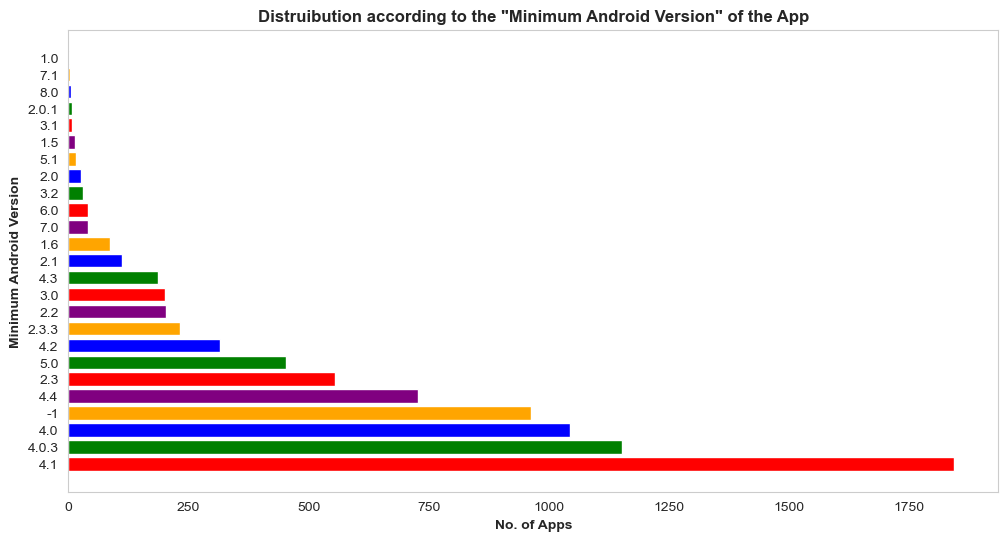

In [30]:
fig,ax=plt.subplots(figsize=(12,6))
plt.title('Distruibution according to the "Minimum Android Version" of the App',fontweight=600)
plt.ylabel('Minimum Android Version',fontweight='bold')
plt.xlabel('No. of Apps',fontweight='bold')
plt.grid(False)
bar_colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.barh(res4.index,res4.values,color=bar_colors)
plt.show()

--------------------------------------------------------------------------------

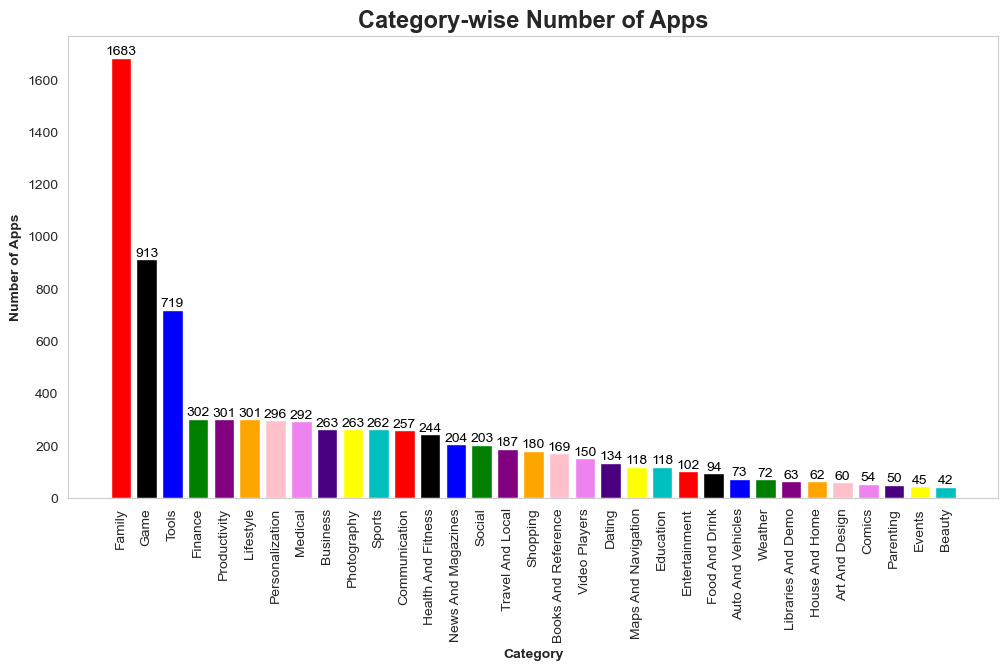

In [52]:
# creating a bar chart of app categories

cd=['red','black','blue','green','purple','orange','pink','violet','indigo','yellow','c']
fig,ax=plt.subplots(figsize=(12,6))
category_counts = data1['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values,color=cd)
plt.xticks(rotation=90)
fig.set_facecolor('w')
plt.grid(False)
plt.xlabel('Category',fontweight='bold')
plt.ylabel('Number of Apps',fontweight='bold')
plt.title("Category-wise Number of Apps",size=17, fontweight='bold')
for i, v in enumerate(category_counts):
   plt.annotate(str(v), xy=(i, v),ha='center',color='black',va='bottom')

plt.show()


**Observing the Barchart we can see that `Family` and `Games` are the Categories which are having the most number of applications.**

In [32]:
res=data1.groupby(['Category'])['Installs'].sum()

In [33]:
res

Category
Art And Design           114228100
Auto And Vehicles         53129800
Beauty                    26916200
Books And Reference     1665791655
Business                 697018120
Comics                    44931100
Communication          11039241530
Dating                   140912410
Education                352852000
Entertainment           2113660000
Events                    15949410
Family                  8885030590
Finance                  455312400
Food And Drink           211677750
Game                   13928762717
Health And Fitness      1144006220
House And Home            97082000
Libraries And Demo        51083000
Lifestyle                503741120
Maps And Navigation      503267560
Medical                   39252676
News And Magazines      2369110650
Parenting                 31116110
Personalization         1532341930
Photography             4649143130
Productivity            5793070180
Shopping                1400331540
Social                  5487841475
Sports     

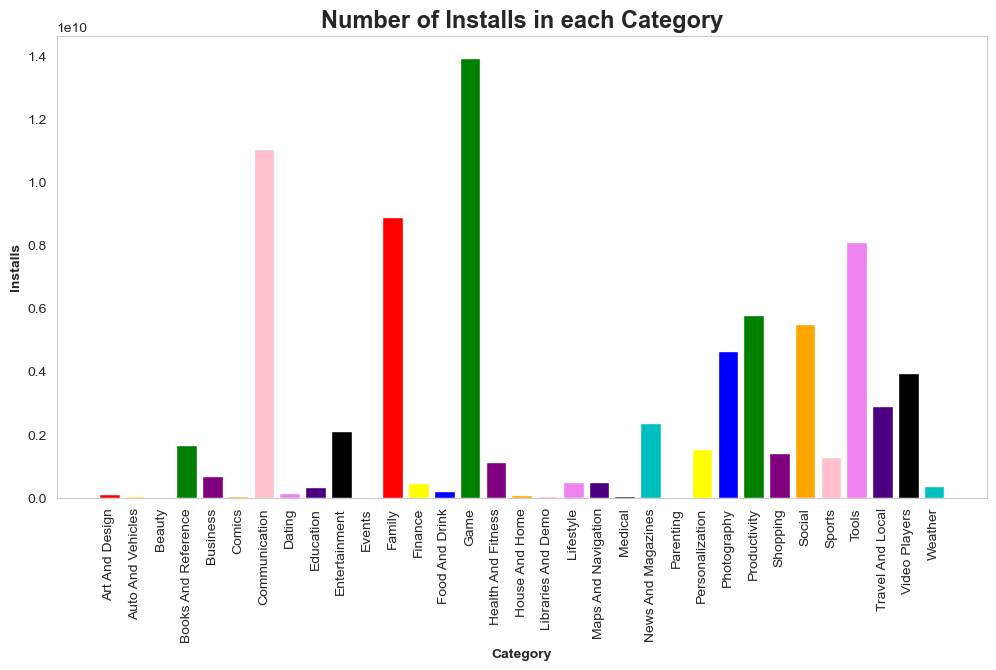

In [34]:
cd=['red','yellow','blue','green','purple','orange','pink','violet','indigo','black','c']
fig,ax=plt.subplots(figsize=(12,6))
plt.bar(res.index, res.values,color=cd)
plt.xlabel('Category',fontweight='bold')
plt.ylabel('Installs',fontweight='bold')
plt.grid(False)
plt.xticks(rotation=90)
plt.title("Number of Installs in each Category",size=17, fontweight='bold')
plt.show()

It can be observed from the above graph, that the **Most Number of Installs** are from:

    1. Games (13928762717 Installs)
    2. Communication (11039241530 Installs)
    3. Family (885030590 Installs)
    4. Tools (8100224500 Installs)
    5. Productivity (5793070180 Installs)
    
The **Least Number of Installs** are from:

    1. Events (15949410 Installs)
    2. Beauty (26916200 Installs)
    3. Parenting (31116110 Installs)
    4. Medical (39252676 Installs)
    5. Comics (44931100 Installs)

In [35]:
res2=data1.groupby(['Category'])['Rating'].mean()
res2

Category
Art And Design         4.376667
Auto And Vehicles      4.190411
Beauty                 4.278571
Books And Reference    4.344970
Business               4.098479
Comics                 4.181481
Communication          4.121401
Dating                 3.970149
Education              4.364407
Entertainment          4.135294
Events                 4.435556
Family                 4.187285
Finance                4.115563
Food And Drink         4.172340
Game                   4.247645
Health And Fitness     4.243033
House And Home         4.150000
Libraries And Demo     4.179365
Lifestyle              4.093355
Maps And Navigation    4.036441
Medical                4.169178
News And Magazines     4.121569
Parenting              4.300000
Personalization        4.331419
Photography            4.157414
Productivity           4.183389
Shopping               4.230000
Social                 4.247291
Sports                 4.218702
Tools                  4.040334
Travel And Local       4.069519

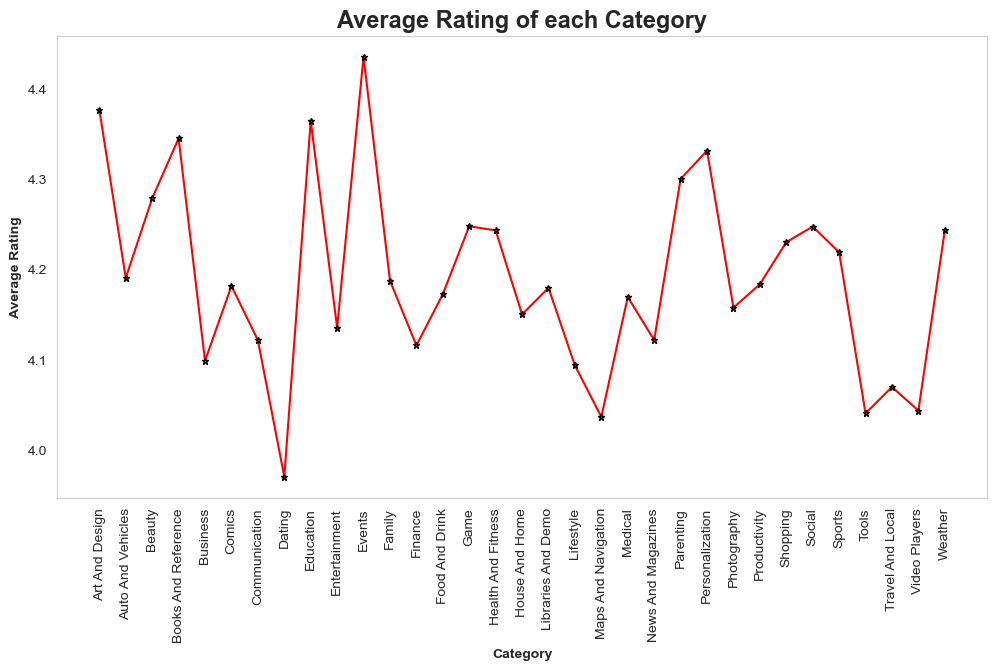

In [36]:
fig,ax=plt.subplots(figsize=(12,6))
plt.plot(res2,marker='*',color='red',ms=5,mec='black')
plt.xlabel('Category',fontweight='bold')
plt.ylabel('Average Rating',fontweight='bold')
plt.grid(False)
plt.xticks(rotation=90)
plt.title("Average Rating of each Category",size=17, fontweight='bold')
plt.show()

It can be observed from the above graph, that the **Top 2 Most Rated App Categories are:**
    
    1. Events (4.43)
    2. Art and Design (4.37)
    
**Least Rated App Categories are:**
    
    1. Dating (3.97)

In [37]:
correlation=data1.corr()

<AxesSubplot:>

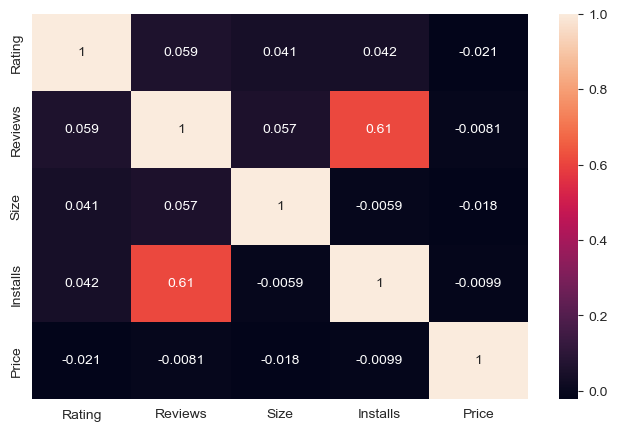

In [38]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(correlation,annot=True)

Using the **Correlation Matrix**, we can understand the relationship between the Attributes of the Dataset, here we can observe that `Reviews` and `Installs` have the highest correlation.

**4. Finding out Number of Paid and Free Apps and their Distribution**

In [39]:
free_or_paid_df=data1.groupby('Type')[['App']].count()

In [40]:
free_or_paid_df

,App
Type,
Free,7672
Paid,604


Text(0.5, 1.0, 'Distribution of Apps based on Paid/Free')

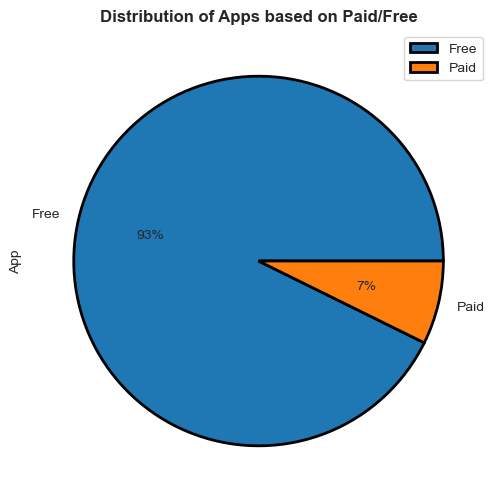

In [41]:
free_or_paid_df.plot.pie(subplots=True, figsize=(12, 6), wedgeprops={"edgecolor":"0",'linewidth': 2, 'antialiased': True}, 
                         autopct='%1.0f%%')
plt.title('Distribution of Apps based on Paid/Free',fontweight=600)

**5. Price Range Specific Distribution**

In [42]:
# Defining the price ranges
price_ranges = [-0.01, 1, 3, 5, 7, 10, 13, 15, 18, 21, float('inf')]
price_labels = ['<1', '1-3', '3-5', '5-7', '7-10', '10-13','13-15','15-18','18-21', '21+']

# Grouping data points based on price ranges
data1['Price Range'] = pd.cut(data1['Price'], bins=price_ranges, labels=price_labels)

# Display the data grouped by price ranges
grouped_data = data1.groupby('Price Range')['App'].count()
grouped_data

Price Range
<1       7777
1-3       234
3-5       149
5-7        29
7-10       31
10-13       9
13-15      10
15-18       6
18-21       6
21+        25
Name: App, dtype: int64

In [149]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



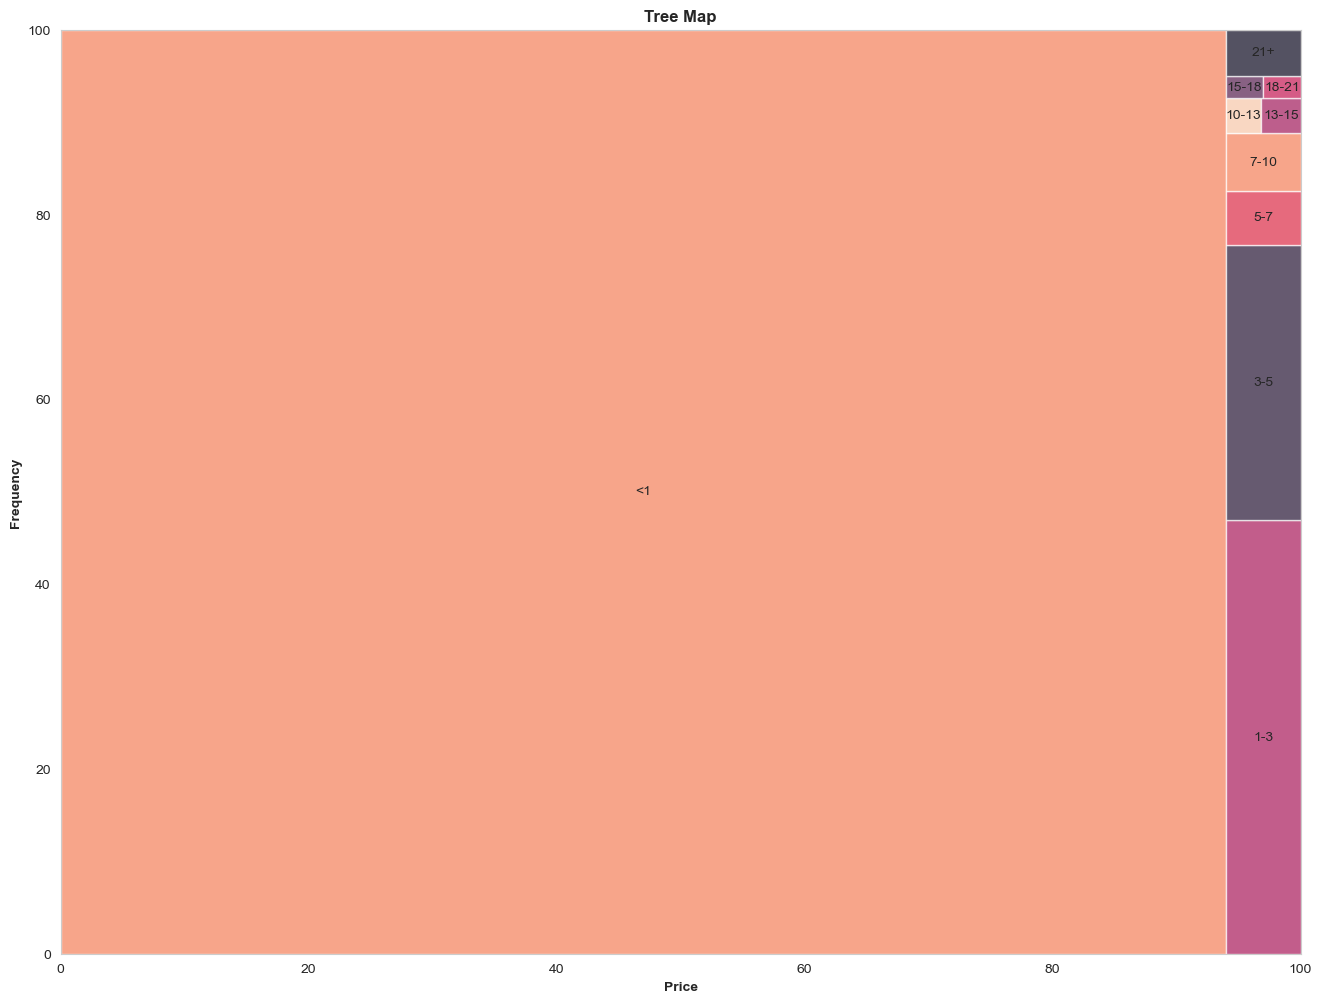

In [56]:
import squarify

fig,ax=plt.subplots(figsize=(16,12))
categories=np.array(grouped_data.index)
values=np.array(grouped_data.values)
# Calculating the sizes for the tree map
sizes = [value / sum(values) for value in values]
# Creating the tree map
squarify.plot(sizes=sizes, label=categories, alpha=0.7)

# Set the axis labels and title
plt.xlabel('Price',fontweight='bold')
plt.grid(False)
plt.ylabel('Frequency',fontweight='bold')
plt.title('Tree Map',fontweight='bold')
plt.show()

We can observe that: **7777 Apps** are priced **0.0 (Free)** and **499 Apps** are **>0.0 (Paid).**
    
    Out of the Paid Apps: (Amt. in Dollars)
        1-3 ---> 234
        3-5 ---> 149
        5-7 ---> 29
        7-10 --> 31
        10-13 -> 9
        13-15 -> 10
        15-18 -> 6
        18-21 -> 6
        21+ ---> 25
        
**Apps greater than 15$** can be considered **EXPENSIVE APPS.**

**6. Plotting Heatmap for Number of Apps in each age group.**

<AxesSubplot:title={'center':'No. of Apps rated in each Age Group'}, ylabel='Content Rating'>

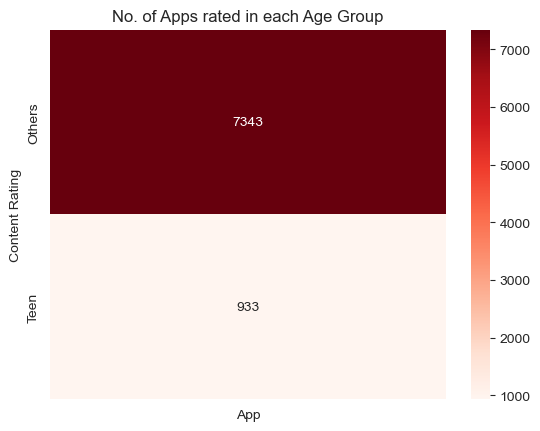

In [44]:
plt.title("No. of Apps rated in each Age Group")
sns.heatmap(data1.groupby('Content Rating')[['App']].count(),fmt="d", annot=True, cmap='Reds')

**7. Apps have large Number of Reviews**

In [45]:
data1.sort_values(by=['Reviews'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Minimum Android Ver,Genres,Price Range
1892,Facebook,Social,4.1,78158306,1.0,1000000000,Free,0.0,Teen,"August 3, 2018",-1,Social,<1
287,WhatsApp Messenger,Communication,4.4,69119316,1.0,1000000000,Free,0.0,Others,"August 3, 2018",-1,Communication,<1
1893,Instagram,Social,4.5,66577313,1.0,1000000000,Free,0.0,Teen,"July 31, 2018",-1,Social,<1
286,Messenger – Text and Video Chat for Free,Communication,4.0,56642847,1.0,1000000000,Free,0.0,Others,"August 1, 2018",-1,Communication,<1
1291,Clash of Clans,Game,4.6,44891723,98.0,100000000,Free,0.0,Others,"July 15, 2018",4.1,Strategy,<1
3054,Clash of Clans,Family,4.6,44881447,98.0,100000000,Free,0.0,Others,"July 15, 2018",4.1,Strategy,<1
3072,Clean Master- Space Cleaner & Antivirus,Tools,4.7,42916526,1.0,500000000,Free,0.0,Others,"August 3, 2018",-1,Tools,<1
1275,Subway Surfers,Game,4.5,27722264,76.0,1000000000,Free,0.0,Others,"July 12, 2018",4.1,Arcade,<1
2787,YouTube,Video Players,4.3,25655305,1.0,1000000000,Free,0.0,Teen,"August 2, 2018",-1,Video Players & Editors,<1
5746,"Security Master - Antivirus, VPN, AppLock, Boo...",Tools,4.7,24900999,1.0,500000000,Free,0.0,Others,"August 4, 2018",-1,Tools,<1


**8. Top 15 Apps with the Largest Size**

In [46]:
data1.sort_values(by=['Size'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Minimum Android Ver,Genres,Price Range
4568,Gangster Town: Vice District,Family,4.3,65146,100.0,10000000,Free,0.00,Others,"May 31, 2018",4.0,Simulation,<1
6442,Car Crash III Beam DH Real Damage Simulator 2018,Game,3.6,151,100.0,10000,Free,0.00,Others,"May 20, 2018",4.1,Racing,<1
3629,Vi Trainer,Health And Fitness,3.6,124,100.0,5000,Free,0.00,Others,"August 2, 2018",5.0,Health & Fitness,<1
7047,Stickman Legends: Shadow Wars,Game,4.4,38419,100.0,1000000,Paid,0.99,Others,"August 3, 2018",4.1,Action,<1
1737,Navi Radiography Pro,Medical,4.7,11,100.0,500,Paid,15.99,Others,"January 14, 2018",4.0.3,Medical,15-18
4304,The Walking Dead: Our World,Game,4.0,22435,100.0,1000000,Free,0.00,Teen,"August 1, 2018",5.0,Action,<1
4566,Miami crime simulator,Game,4.0,254518,100.0,10000000,Free,0.00,Others,"July 9, 2018",4.0,Action,<1
4221,Ultimate Tennis,Sports,4.3,183004,100.0,10000000,Free,0.00,Others,"July 19, 2018",4.0.3,Sports,<1
6793,Draft Simulator for FUT 18,Sports,4.6,162933,100.0,5000000,Free,0.00,Others,"May 11, 2018",4.1,Sports,<1
1196,Talking Babsy Baby: Baby Games,Lifestyle,4.0,140995,100.0,10000000,Free,0.00,Others,"July 16, 2018",4.0,Lifestyle,<1


**9. Number of Paid Apps in each Category.**

In [47]:
# Number of paid apps in each category
paid_apps_by_category = data[data['Type'] == 'Paid'].groupby('Category').size()
print("\nNumber of Paid Apps in Each Category:")
print(paid_apps_by_category)


Number of Paid Apps in Each Category:
Category
Art And Design           3
Auto And Vehicles        1
Books And Reference      8
Business                 9
Communication           22
Dating                   3
Education                4
Entertainment            2
Family                 155
Finance                 13
Food And Drink           2
Game                    76
Health And Fitness      11
Lifestyle               18
Maps And Navigation      5
Medical                 63
News And Magazines       2
Parenting                2
Personalization         64
Photography             15
Productivity            18
Shopping                 2
Social                   2
Sports                  22
Tools                   63
Travel And Local         8
Video Players            4
Weather                  7
dtype: int64


# THANK YOU